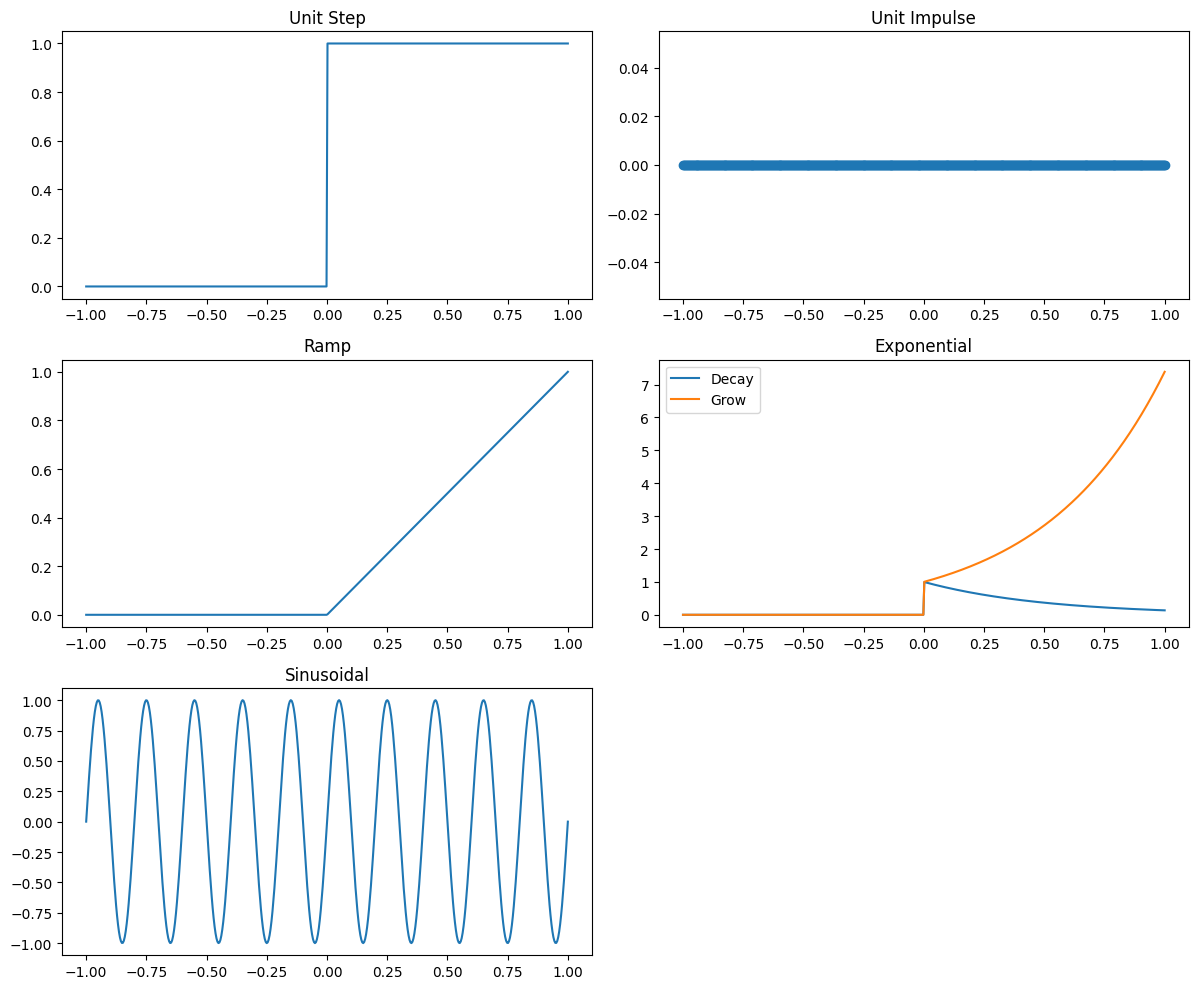

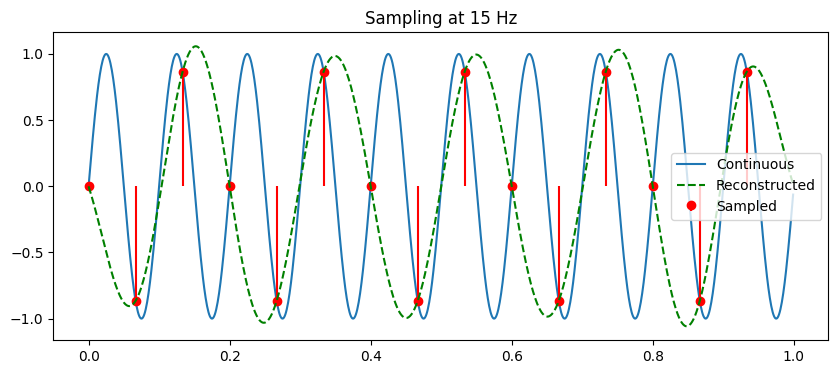

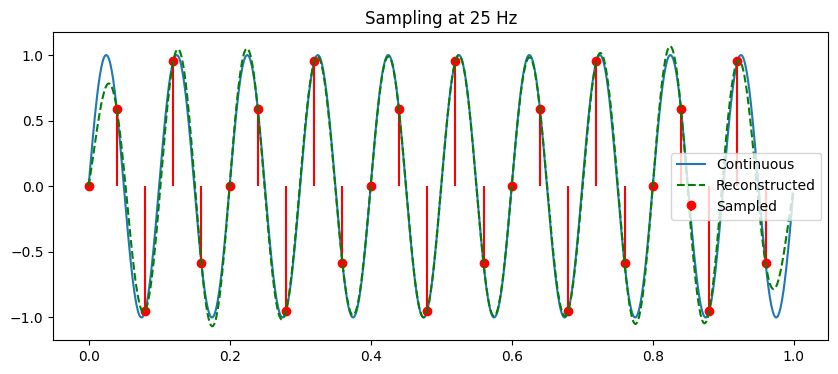

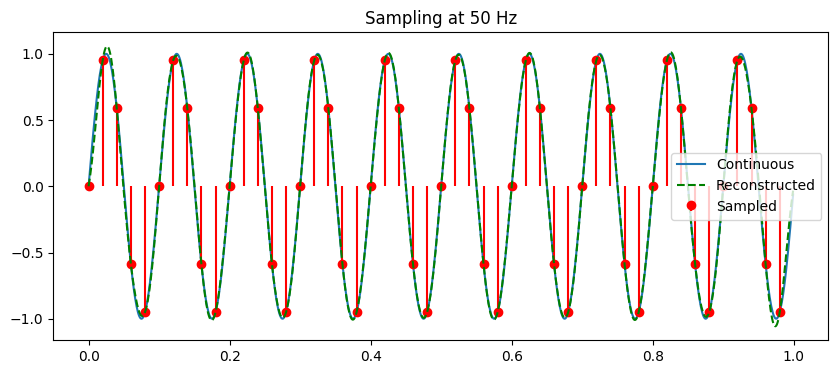

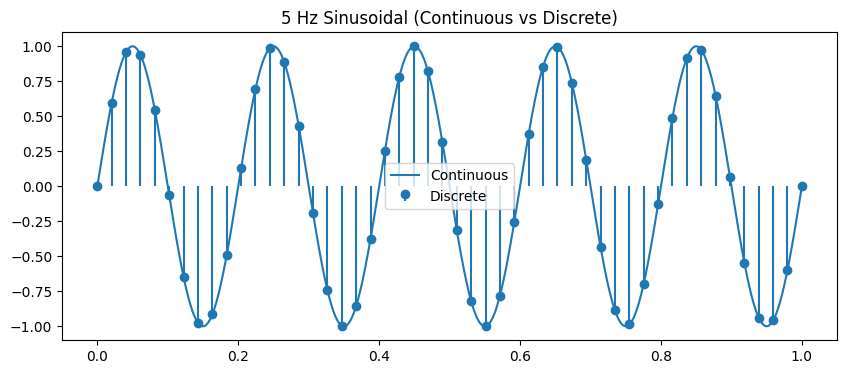

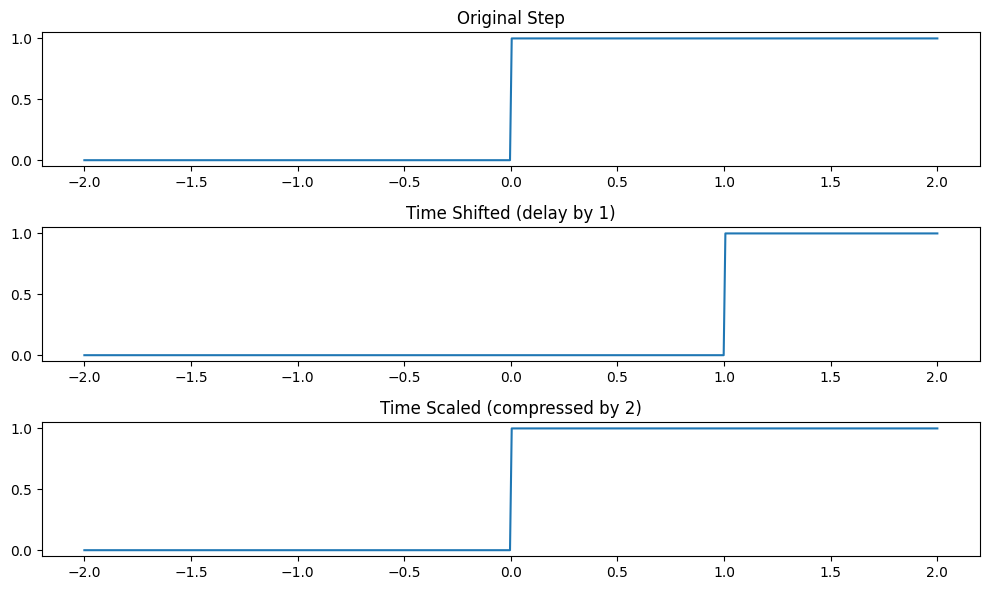

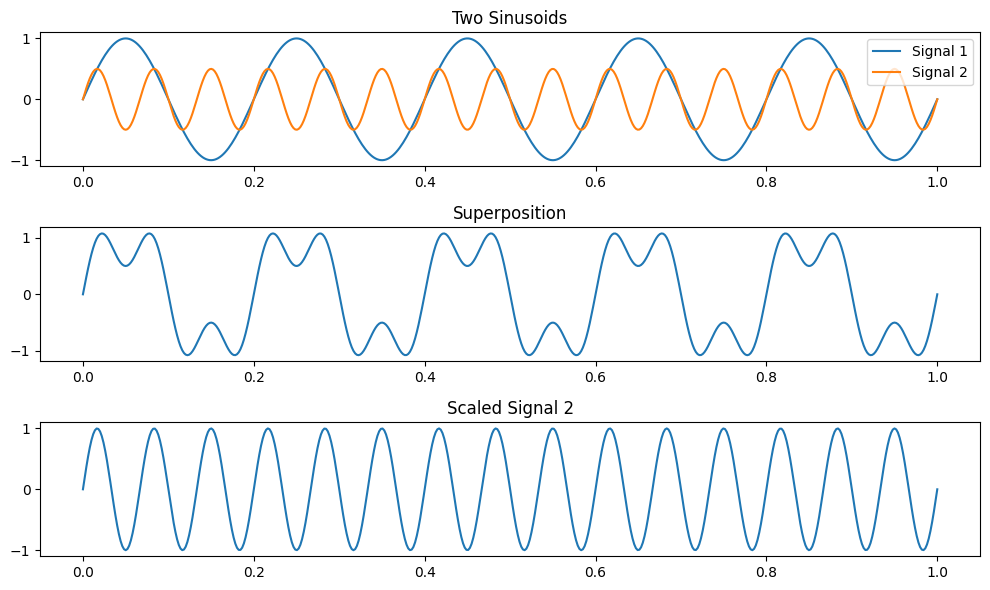

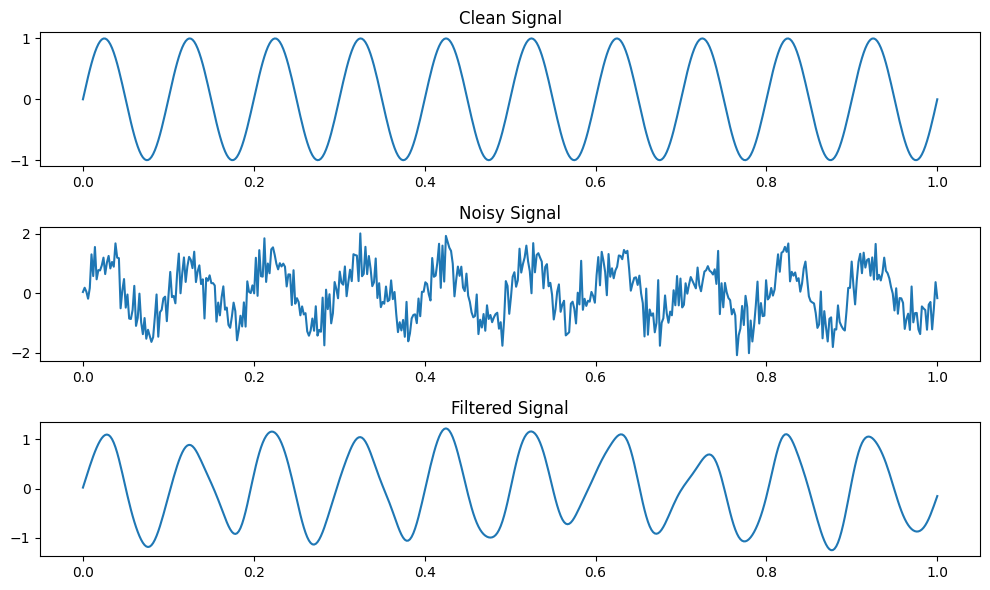

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# (1) Standard Signals

t = np.linspace(-1, 1, 500)

# (a) Unit Step
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# (b) Unit Impulse (approximation)
def unit_impulse(t):
    return np.where(t == 0, 1, 0)

# (c) Ramp
def ramp(t):
    return np.where(t >= 0, t, 0)

# (d) Exponential (decaying and growing)
exp_decay = np.exp(-2*t) * (t>=0)
exp_grow = np.exp(2*t) * (t>=0)

# (e) Sinusoidal
sin_wave = np.sin(2*np.pi*5*t)

plt.figure(figsize=(12,10))
plt.subplot(3,2,1); plt.plot(t, unit_step(t)); plt.title("Unit Step")
plt.subplot(3,2,2); plt.stem(t, unit_impulse(t), basefmt=" "); plt.title("Unit Impulse")
plt.subplot(3,2,3); plt.plot(t, ramp(t)); plt.title("Ramp")
plt.subplot(3,2,4); plt.plot(t, exp_decay, label="Decay"); plt.plot(t, exp_grow, label="Grow"); plt.title("Exponential"); plt.legend()
plt.subplot(3,2,5); plt.plot(t, sin_wave); plt.title("Sinusoidal")
plt.tight_layout(); plt.show()

# (2) Sampling & Aliasing
fs_cont = 1000  # high rate for continuous approx
t_cont = np.linspace(0, 1, fs_cont, endpoint=False)
cont_signal = np.sin(2*np.pi*10*t_cont)

fs_values = [15, 25, 50]  # below, around, and above Nyquist (20 Hz)

for fs in fs_values:
    t_samp = np.linspace(0, 1, fs, endpoint=False)
    sampled = np.sin(2*np.pi*10*t_samp)

    # Reconstruct with sinc interpolation
    t_recon = t_cont
    recon = np.zeros_like(t_recon)
    for n, xn in enumerate(sampled):
        recon += xn * np.sinc((t_recon*fs) - n)

    plt.figure(figsize=(10,4))
    plt.plot(t_cont, cont_signal, label="Continuous")
    plt.stem(t_samp, sampled, linefmt="r-", markerfmt="ro", basefmt=" ", label="Sampled")
    plt.plot(t_recon, recon, 'g--', label="Reconstructed")
    plt.title(f"Sampling at {fs} Hz")
    plt.legend(); plt.show()

# (3) Sinusoidal 5 Hz
A, f, dur = 1, 5, 1
fs_disc = 50
t_cont = np.linspace(0, dur, 1000)
t_disc = np.linspace(0, dur, fs_disc)
cont_signal = A*np.sin(2*np.pi*f*t_cont)
disc_signal = A*np.sin(2*np.pi*f*t_disc)

plt.figure(figsize=(10,4))
plt.plot(t_cont, cont_signal, label="Continuous")
plt.stem(t_disc, disc_signal, basefmt=" ", label="Discrete")
plt.title("5 Hz Sinusoidal (Continuous vs Discrete)")
plt.legend(); plt.show()

# (4) Time Shifting & Scaling

t = np.linspace(-2, 2, 500)
u = unit_step(t)

# Shift (delay by 1)
shifted = unit_step(t-1)
# Scale (compress by 2)
scaled = unit_step(2*t)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1); plt.plot(t,u); plt.title("Original Step")
plt.subplot(3,1,2); plt.plot(t,shifted); plt.title("Time Shifted (delay by 1)")
plt.subplot(3,1,3); plt.plot(t,scaled); plt.title("Time Scaled (compressed by 2)")
plt.tight_layout(); plt.show()

# (5) Superposition & Scaling

t = np.linspace(0,1,500)
sig1 = np.sin(2*np.pi*5*t)
sig2 = 0.5*np.sin(2*np.pi*15*t)
combined = sig1 + sig2
scaled = 2*sig2

plt.figure(figsize=(10,6))
plt.subplot(3,1,1); plt.plot(t,sig1, label="Signal 1"); plt.plot(t,sig2, label="Signal 2"); plt.legend(); plt.title("Two Sinusoids")
plt.subplot(3,1,2); plt.plot(t,combined); plt.title("Superposition")
plt.subplot(3,1,3); plt.plot(t,scaled); plt.title("Scaled Signal 2")
plt.tight_layout(); plt.show()

# (6) Noise & Filtering
fs = 500
t = np.linspace(0,1,fs)
clean = np.sin(2*np.pi*10*t)
noise = np.random.normal(0,0.5,fs)
noisy = clean + noise

# Low-pass filter (Butterworth)
b,a = signal.butter(4, 0.1)  # cutoff ~ fs/10
filtered = signal.filtfilt(b,a,noisy)

plt.figure(figsize=(10,6))
plt.subplot(3,1,1); plt.plot(t,clean); plt.title("Clean Signal")
plt.subplot(3,1,2); plt.plot(t,noisy); plt.title("Noisy Signal")
plt.subplot(3,1,3); plt.plot(t,filtered); plt.title("Filtered Signal")
plt.tight_layout(); plt.show()